In [6]:
import pandas as pd  
import numpy as np  
  
# 读取原始CSV文件  
df_original = pd.read_csv('shap.csv')  
  
# 初始化一个空的列名列表  
new_columns = []  
  
# 外层循环遍历i值  
for i in ['C_1','C_2','C_3','D_1','D_2','E_1','E_2','E_3','F_3']:  
    # 内层循环遍历j值，并生成新的列名  
    for j in range(1, 11):  
        # 生成新的列名  
        new_column_name = f"{i}_{j}"  
        new_columns.append(new_column_name)  
          
        # 设置原始设置字符串  
        original_setting = "informer_DWT13-20_shuffled_{}_{}_ftMS_sl20_ll15_pl1_dm512_nh16_el2_dl2_df2048_atprob_fc5_ebtimeF_dtFalse_mxTrue_prote_1"  
        setting = original_setting.format(i, j)  
          
        # 加载预测结果  
        preds = np.load('./results/'+setting+'/pred.npy')  
          
        # 使用squeeze移除单维度（如果preds是多维的）  
        arr_squeeze = np.squeeze(preds)  
          
        # 将一维数组作为新列添加到df_original中  
        df_original[new_column_name] = arr_squeeze  
  
#确保所有新列都添加到了df_original中  
assert set(new_columns).issubset(df_original.columns), "Not all new columns were added."  
  
# 将修改后的DataFrame写回到CSV文件（这会覆盖原始文件）  
df_original.to_csv('shap.csv', index=False)

In [10]:
import pandas as pd    
import numpy as np    
from sklearn.metrics import r2_score    
import matplotlib.pyplot as plt    
  
# 读取数据    
df = pd.read_csv('shap.csv')    
  
# 计算DWT列的R^2    
true_values = df['TRUE']    
dwt_predictions = df['DWT-Informer']    
r2_dwt = r2_score(true_values, dwt_predictions)    
  
# 初始化列表来保存R^2和减少比例    
r2_scores = []    
reduction_ratios = []    
  
# 遍历打乱变量的预测值列    
# 假设从第四列开始是C_1_1, C_1_2, ..., C_1_10, 然后是C_2_1, C_2_2, ...  
for col in df.columns[3:]:    
    # 计算当前列的R^2    
    r2_current = r2_score(true_values, df[col])    
    r2_scores.append(r2_current)    
      
    # 计算R^2相对于DWT的R^2的减少比例    
    reduction_ratio = (r2_dwt - r2_current) / r2_dwt if r2_dwt != 0 else 0    
    reduction_ratios.append(reduction_ratio)    
  
print(len(reduction_ratios))

90


In [11]:
# 初始化一个空列表来保存每十个元素的平均值  
averages = []  
  
# 循环遍历列表，步长为10  
for i in range(0, len(reduction_ratios), 10):  
    # 切片获取每十个元素  
    subset = reduction_ratios[i:i+10]  
    # 计算平均值并添加到averages列表中  
    averages.append(sum(subset) / len(subset))   
# 打印结果  
print(averages)

[0.0865155817132742, 0.10417677516022887, 0.0831094134128094, 0.031254613717475614, 0.1910093234804296, 0.03859396751182, 0.04873249818769839, 0.12414408204664658, 0.15139417488759005]


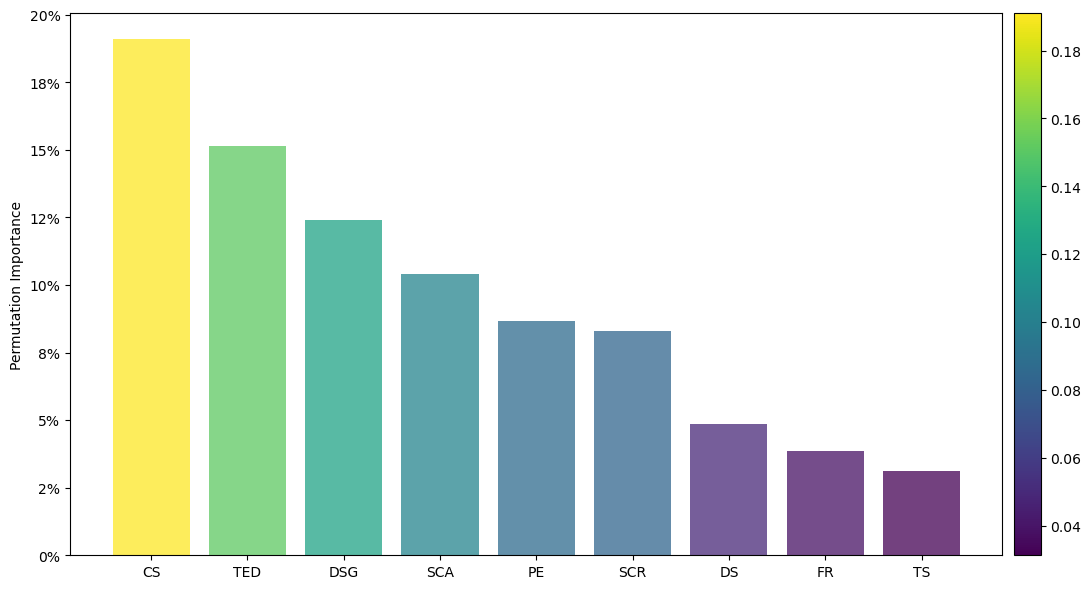

In [12]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

variables = ["PE", "SCA", "SCR", "TS", "CS", "FR", "DS", "DSG", "TED"]
combined = list(zip(variables, averages))

sorted_combined = sorted(combined, key=lambda x: x[1], reverse=True)

sorted_variables = [x[0] for x in sorted_combined]
sorted_averages = [x[1] for x in sorted_combined]

norm = plt.Normalize(min(sorted_averages), max(sorted_averages))
colors = cm.viridis(norm(sorted_averages))

plt.figure(figsize=(12, 6))
bar_positions = range(len(sorted_variables))
bars = plt.bar(bar_positions, sorted_averages, align='center', color=colors, alpha=0.75)

plt.xticks(bar_positions, sorted_variables)
plt.ylabel('Permutation Importance')

def format_percent(x, pos):
    return '{:.0%}'.format(x)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_percent))

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap=cm.viridis, norm=norm)
sm.set_array([])  # 这一行是必要的，尽管我们没有实际的数据数组
plt.colorbar(sm, ax=plt.gca(), pad=0.01)  # pad参数控制颜色条与图形之间的距离

plt.tight_layout()
plt.savefig('permutation0712.svg', format='svg')
plt.show()


